In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [248]:
# reading data scrapped by python script
df = pd.DataFrame(pd.read_excel('ALL_OFFERS.xlsx'))
df

,Price,Name,Shop
0,306,Astro Bot Gra PS5,MEDIA_EXPERT
1,338,EA SPORTS FC 25 Gra PS5,MEDIA_EXPERT
2,309,Stellar Blade Gra PS5,MEDIA_EXPERT
3,309,Rise of the Ronin Gra PS5,MEDIA_EXPERT
4,1 019,Marvel's Spider-Man 2 - Edycja Kolekcjonerska ...,MEDIA_EXPERT
...,...,...,...
822,"189,00 zł",PlayStation The Dark Pictures Anthology: The D...,X-KOM
823,"219,00 zł",PlayStation NBA 2K23,X-KOM
824,"179,00 zł",PlayStation PAC‑MAN WORLD Re‑PAC,X-KOM
825,"229,00 zł",PlayStation Death's Door: Ultimate Edition,X-KOM


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   827 non-null    object
 1   Name    827 non-null    object
 2   Shop    827 non-null    object
dtypes: object(3)
memory usage: 19.5+ KB


In [250]:
# cleaning 'Price' column

df['Price'] = df['Price'].str.replace('\u202f', '')
df['Price'] = df['Price'].str.replace(' ', '')
df['Price'] = df['Price'].str.rstrip('zł')
df['Price'] = df['Price'].str.replace(',', '.')
df['Price'] = df['Price'].astype(float)


In [251]:
df

,Price,Name,Shop
0,306.0,Astro Bot Gra PS5,MEDIA_EXPERT
1,338.0,EA SPORTS FC 25 Gra PS5,MEDIA_EXPERT
2,309.0,Stellar Blade Gra PS5,MEDIA_EXPERT
3,309.0,Rise of the Ronin Gra PS5,MEDIA_EXPERT
4,1019.0,Marvel's Spider-Man 2 - Edycja Kolekcjonerska ...,MEDIA_EXPERT
...,...,...,...
822,189.0,PlayStation The Dark Pictures Anthology: The D...,X-KOM
823,219.0,PlayStation NBA 2K23,X-KOM
824,179.0,PlayStation PAC‑MAN WORLD Re‑PAC,X-KOM
825,229.0,PlayStation Death's Door: Ultimate Edition,X-KOM


In [252]:
# cleaning 'Name' column

df['Name'] = df['Name'].str.replace('PlayStation', '').str.replace('Gra na PS5', '').str.replace('Gra PS5', '')
df = df.loc[(~df.Name.str.contains('(Kompatybilna z PS5)')) & (~df.Name.str.contains('Kod aktywacyjny SONY'))].reset_index(drop=True)


<ipython-input-252-c8b99246b79e>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df.loc[(~df.Name.str.contains('(Kompatybilna z PS5)')) & (~df.Name.str.contains('Kod aktywacyjny SONY'))].reset_index(drop=True)


In [253]:
df

,Price,Name,Shop
0,306.0,Astro Bot,MEDIA_EXPERT
1,338.0,EA SPORTS FC 25,MEDIA_EXPERT
2,309.0,Stellar Blade,MEDIA_EXPERT
3,309.0,Rise of the Ronin,MEDIA_EXPERT
4,1019.0,Marvel's Spider-Man 2 - Edycja Kolekcjonerska,MEDIA_EXPERT
...,...,...,...
775,189.0,The Dark Pictures Anthology: The Devil In Me,X-KOM
776,219.0,NBA 2K23,X-KOM
777,179.0,PAC‑MAN WORLD Re‑PAC,X-KOM
778,229.0,Death's Door: Ultimate Edition,X-KOM


### Summary before eliminating outliers from dataset

In [254]:
print('Average price of PS5 games in all stores: ', df.Price.mean())
print('Maximum price of a PS5 game: ', df.Price.max())
print('Minimum price of a PS5 game: ', df.Price.min())
print('Median price of PS5 games in all stores: ', df.Price.median())

Average price of PS5 games in all stores:  244.55897435897435
Maximum price of a PS5 game:  1649.0
Minimum price of a PS5 game:  59.0
Median price of PS5 games in all stores:  209.0


In [255]:
df.groupby('Shop')['Price'].mean().round(2)

,Price
Shop,
MEDIA_EXPERT,238.32
RTV_EURO_AGD,251.02
X-KOM,241.72


In [256]:
df.groupby('Shop')['Name'].count()

,Name
Shop,
MEDIA_EXPERT,155
RTV_EURO_AGD,295
X-KOM,330


### Eliminating Outliers

In [257]:
# calculating outliers

def calculateOutliers(df):
  Q1 = df['Price'].quantile(0.25)
  Q3 = df['Price'].quantile(0.75)
  IQR = Q3 - Q1
  outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]

  return outliers

In [258]:
def createScatterPlot(df):
  plt.figure(figsize=(15, 8))

  # calculating outliers
  outliers = calculateOutliers(df)

  # scatter plot
  sns.scatterplot(x='Name', y='Price', data=df, label='Prices')
  sns.scatterplot(x='Name', y='Price', data=outliers, color='r', label='Outliers')

  plt.axhline(median, color='r', linestyle='--', label='Median')
  plt.axhline(q1, color='g', linestyle='--', label='25th Percentile')
  plt.axhline(q3, color='b', linestyle='--', label='75th Percentile')

  plt.title('Scatter Plot with Outliers Highlighted')
  plt.xticks(ticks=[], labels=[])
  plt.legend()

  plt.show()


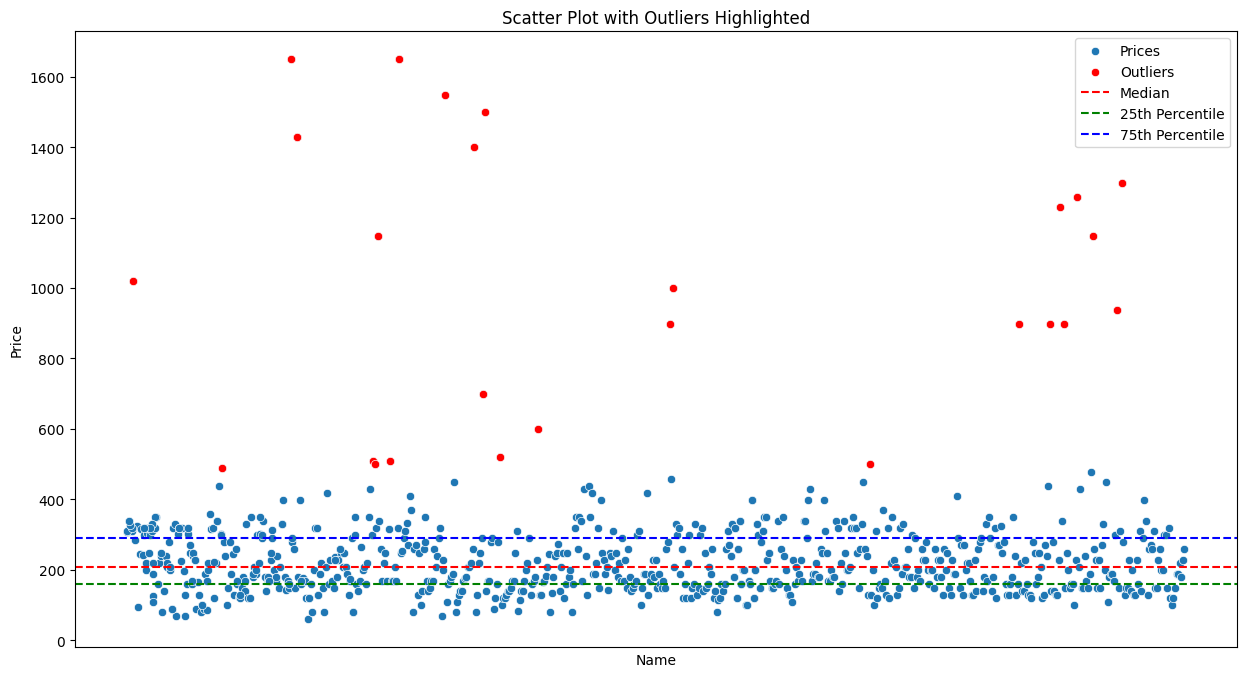

In [259]:
createScatterPlot(df)

In [260]:
# The high price values ​​in the dataset are most likely due to the presence of special/limited edition games, which are usually only considered by enthusiasts, so I filter the data set to remove outliers from upper range.
# There are no outliers in the lower range in the data set. This can be seen in the graph above.

outliers = calculateOutliers(df)
df = df[~df.isin(outliers)].dropna()

df

,Price,Name,Shop
0,306.0,Astro Bot,MEDIA_EXPERT
1,338.0,EA SPORTS FC 25,MEDIA_EXPERT
2,309.0,Stellar Blade,MEDIA_EXPERT
3,309.0,Rise of the Ronin,MEDIA_EXPERT
5,285.0,Sackboy: A Big Adventure,MEDIA_EXPERT
...,...,...,...
775,189.0,The Dark Pictures Anthology: The Devil In Me,X-KOM
776,219.0,NBA 2K23,X-KOM
777,179.0,PAC‑MAN WORLD Re‑PAC,X-KOM
778,229.0,Death's Door: Ultimate Edition,X-KOM


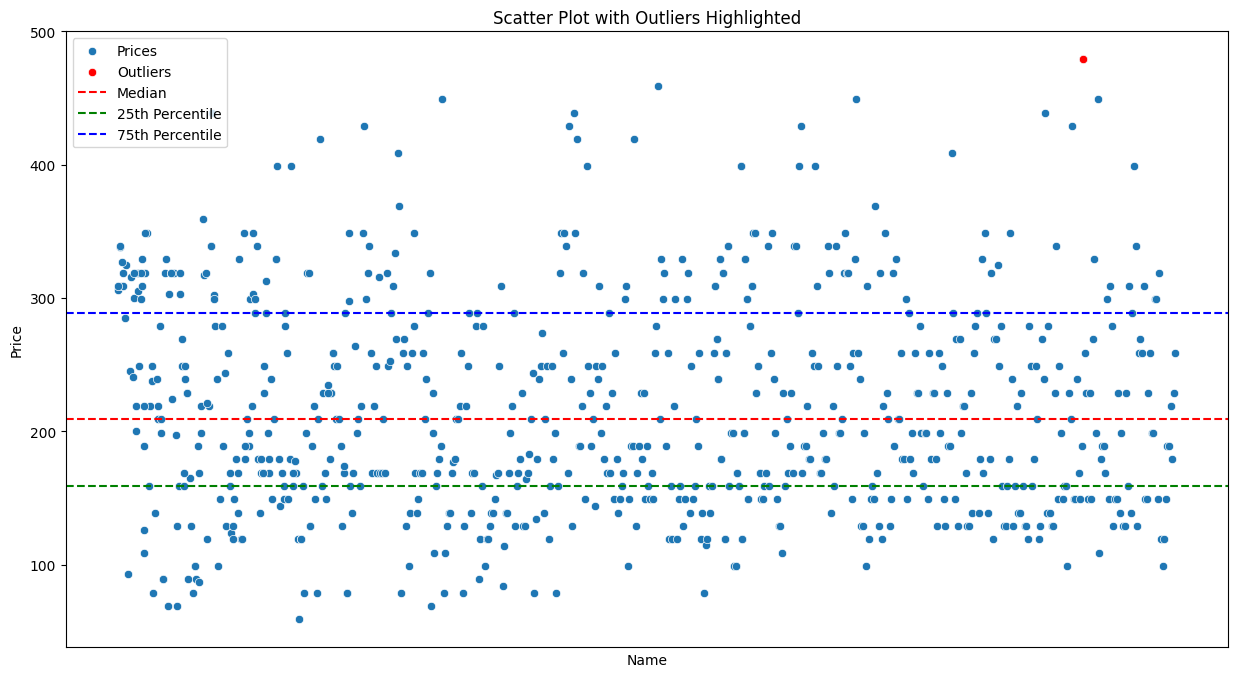

In [261]:
createScatterPlot(df)

### Summary after eliminating outliers from dataset

In [262]:
print('Average price of PS5 games in all stores: ', df.Price.mean())
print('Maximum price of a PS5 game: ', df.Price.max())
print('Minimum price of a PS5 game: ', df.Price.min())
print('Median price of PS5 games in all stores: ', df.Price.median())

Average price of PS5 games in all stores:  216.72509960159363
Maximum price of a PS5 game:  479.0
Minimum price of a PS5 game:  59.0
Median price of PS5 games in all stores:  199.0


In [263]:
mean_price_series = df.groupby('Shop')['Price'].mean().round(2)
mean_price_series

,Price
Shop,
MEDIA_EXPERT,214.26
RTV_EURO_AGD,214.04
X-KOM,220.23


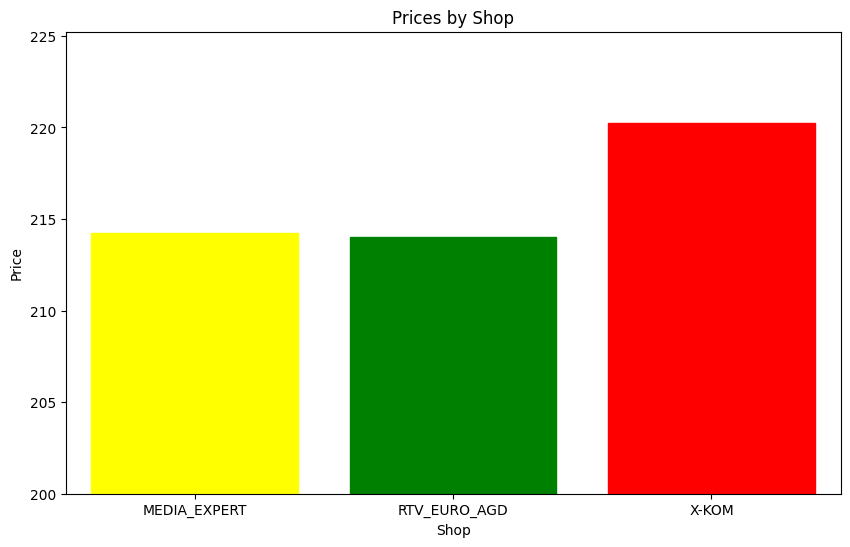

In [264]:
# converting Series to DataFrame
prices_df = mean_price_series.reset_index()
prices_df.columns = ['Shop', 'Price']

# crating bar plot
colors = ['yellow', 'green', 'red']

plt.figure(figsize=(10,6))
ax = sns.barplot(x='Shop', y='Price', data=prices_df)

for i, bar in enumerate(ax.patches):
  bar.set_color(colors[i])

plt.title('Prices by Shop')
plt.ylim(200, prices_df['Price'].max() + 5)
plt.show()

In [265]:
number_of_games = df.groupby('Shop')['Name'].count()
number_of_games

,Name
Shop,
MEDIA_EXPERT,151
RTV_EURO_AGD,281
X-KOM,321


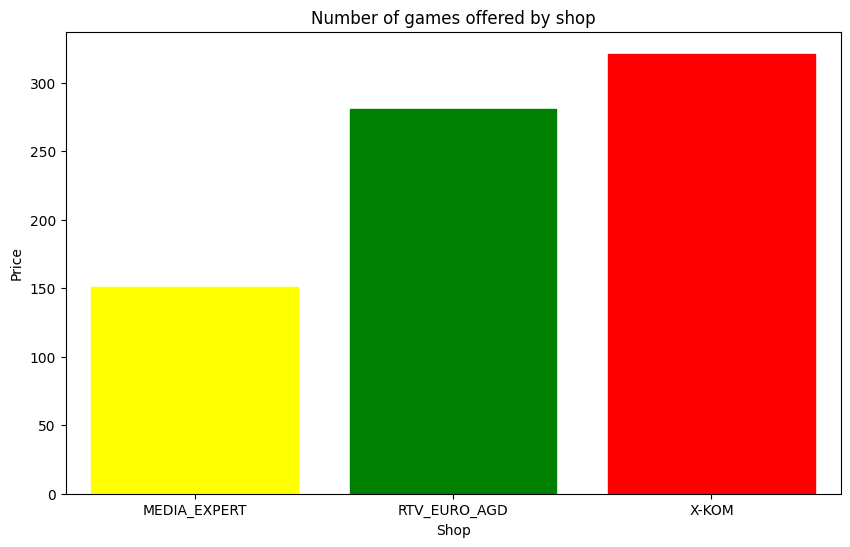

In [266]:
# converting Series to DataFrame
prices_df = number_of_games.reset_index()
prices_df.columns = ['Shop', 'Price']

# crating bar plot
colors = ['yellow', 'green', 'red']

plt.figure(figsize=(10,6))
ax = sns.barplot(x='Shop', y='Price', data=prices_df)

for i, bar in enumerate(ax.patches):
  bar.set_color(colors[i])

plt.title('Number of games offered by shop')
plt.show()